In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("electric_train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593355 entries, 0 to 7593354
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   electric_train.num          int64  
 1   electric_train.tm           object 
 2   electric_train.hh24         int64  
 3   electric_train.n            int64  
 4   electric_train.stn          int64  
 5   electric_train.sum_qctr     int64  
 6   electric_train.sum_load     float64
 7   electric_train.n_mean_load  float64
 8   electric_train.nph_ta       float64
 9   electric_train.nph_hm       float64
 10  electric_train.nph_ws_10m   float64
 11  electric_train.nph_rn_60m   float64
 12  electric_train.nph_ta_chi   float64
 13  electric_train.weekday      int64  
 14  electric_train.week_name    int64  
 15  electric_train.elec         float64
dtypes: float64(8), int64(7), object(1)
memory usage: 926.9+ MB


In [5]:
df.head()

,electric_train.num,electric_train.tm,electric_train.hh24,electric_train.n,electric_train.stn,electric_train.sum_qctr,electric_train.sum_load,electric_train.n_mean_load,electric_train.nph_ta,electric_train.nph_hm,electric_train.nph_ws_10m,electric_train.nph_rn_60m,electric_train.nph_ta_chi,electric_train.weekday,electric_train.week_name,electric_train.elec
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [6]:
print(df['electric_train.stn'].nunique())
print(df['electric_train.n_mean_load'].nunique())

185
866


In [7]:
col_names = list(df.columns)
col_names

['electric_train.num',
 'electric_train.tm',
 'electric_train.hh24',
 'electric_train.n',
 'electric_train.stn',
 'electric_train.sum_qctr',
 'electric_train.sum_load',
 'electric_train.n_mean_load',
 'electric_train.nph_ta',
 'electric_train.nph_hm',
 'electric_train.nph_ws_10m',
 'electric_train.nph_rn_60m',
 'electric_train.nph_ta_chi',
 'electric_train.weekday',
 'electric_train.week_name',
 'electric_train.elec']

In [8]:
for idx,col in enumerate(col_names):
    col = col.split(".")[1]
    col_names[idx] = col
col_names

['num',
 'tm',
 'hh24',
 'n',
 'stn',
 'sum_qctr',
 'sum_load',
 'n_mean_load',
 'nph_ta',
 'nph_hm',
 'nph_ws_10m',
 'nph_rn_60m',
 'nph_ta_chi',
 'weekday',
 'week_name',
 'elec']

In [9]:
df.columns = col_names
df.head()

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73


In [10]:
# 월, 일 변수 추가
df['tm'] = pd.to_datetime(df['tm'])

df['month'] = df['tm'].dt.month
df['day'] = df['tm'].dt.day

df.head()

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,month,day
0,4821,2021-01-01 01:00:00,1,11,884,6950,751.32,68.606449,2.2,62.7,1.8,0.0,-1.0,4,0,99.56,1,1
1,4821,2021-01-01 02:00:00,2,11,884,6950,692.60,68.606449,2.3,63.1,2.1,0.0,-0.6,4,0,91.78,1,1
2,4821,2021-01-01 03:00:00,3,11,884,6950,597.48,68.606449,2.2,62.4,2.5,0.0,-1.3,4,0,79.17,1,1
3,4821,2021-01-01 04:00:00,4,11,884,6950,553.48,68.606449,1.7,63.5,1.7,0.0,-0.2,4,0,73.34,1,1
4,4821,2021-01-01 05:00:00,5,11,884,6950,526.24,68.606449,1.7,63.0,1.6,0.0,-0.8,4,0,69.73,1,1


In [11]:
df[(df['month'] == 5) & (df['day'] == 5)]# 주중 주말만 되어있을 뿐 공휴일 유무는 적용 안되어 있음

,num,tm,hh24,n,stn,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,nph_ta_chi,weekday,week_name,elec,month,day
2975,4821,2021-05-05 00:00:00,24,11,884,6950,710.64,68.606449,17.3,97.2,2.1,0.3,20.2,2,0,94.17,5,5
2976,4821,2021-05-05 01:00:00,1,11,884,6950,604.00,68.606449,16.4,96.9,0.5,0.0,19.3,2,0,80.03,5,5
2977,4821,2021-05-05 02:00:00,2,11,884,6950,544.76,68.606449,16.5,97.7,0.9,0.0,19.4,2,0,72.19,5,5
2978,4821,2021-05-05 03:00:00,3,11,884,6950,501.32,68.606449,16.3,92.8,1.6,0.0,19.0,2,0,66.43,5,5
2979,4821,2021-05-05 04:00:00,4,11,884,6950,456.08,68.606449,16.0,91.6,1.5,0.0,18.6,2,0,60.43,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7587589,20947,2022-05-05 19:00:00,19,23,671,34200,5304.00,225.461986,21.0,42.7,0.6,0.0,20.6,3,0,102.28,5,5
7587590,20947,2022-05-05 20:00:00,20,23,671,34200,5823.44,225.461986,19.5,47.9,0.7,0.0,19.5,3,0,112.30,5,5
7587591,20947,2022-05-05 21:00:00,21,23,671,34200,6055.36,225.461986,18.8,44.5,0.6,0.0,18.6,3,0,116.77,5,5
7587592,20947,2022-05-05 22:00:00,22,23,671,34200,5996.68,225.461986,17.7,46.4,0.5,0.0,17.7,3,0,115.64,5,5


In [12]:
# 수치형 변수 간의 상관계수 확인
cols = ['sum_qctr', 'sum_load', 'n_mean_load','nph_ta', 'nph_hm'
,'nph_ws_10m', 'nph_rn_60m', 'elec']

corr = df[cols].corr(method='pearson')
corr

,sum_qctr,sum_load,n_mean_load,nph_ta,nph_hm,nph_ws_10m,nph_rn_60m,elec
sum_qctr,1.000000,0.912495,0.066926,-0.017072,-0.042615,-0.080546,0.008603,0.000010
sum_load,0.912495,1.000000,0.109313,0.039962,-0.027296,-0.071325,0.009818,0.271294
n_mean_load,0.066926,0.109313,1.000000,-0.010758,-0.019409,-0.050881,-0.003665,-0.000002
nph_ta,-0.017072,0.039962,-0.010758,1.000000,0.318695,0.022744,0.064831,0.192026
nph_hm,-0.042615,-0.027296,-0.019409,0.318695,1.000000,-0.117647,0.140953,0.044462
nph_ws_10m,-0.080546,-0.071325,-0.050881,0.022744,-0.117647,1.000000,0.058259,0.009131
nph_rn_60m,0.008603,0.009818,-0.003665,0.064831,0.140953,0.058259,1.000000,0.009381
elec,0.000010,0.271294,-0.000002,0.192026,0.044462,0.009131,0.009381,1.000000


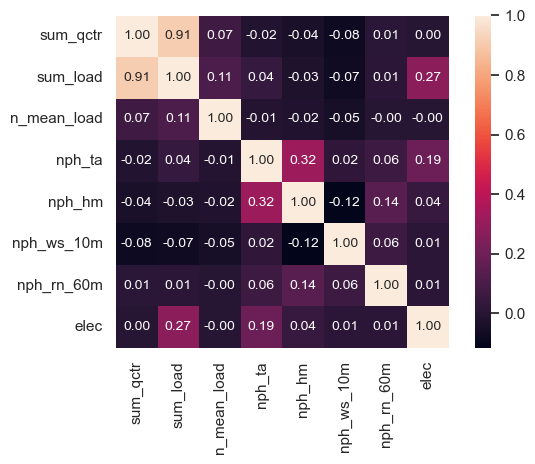

In [13]:
sns.set(font_scale=1.0)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True,
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [15]:
#지점 위치정보
aws = pd.read_csv("AWS_pos.txt",delimiter=',')
aws.head()

,지점번호,경도(degree),위도(degree),노장해발고도(m),지점명(한글),예보구역코드,법정동코드
0,90,128.56472,38.25085,18.06,속초,11D20401,4282033035
1,92,128.66670,38.06670,75.40,양양(공),11D20400,4283032021
2,95,127.30420,38.14788,153.70,철원,11D10101,4278025624
3,96,131.86983,37.23952,96.15,독도,11E00102,4794025027
4,98,127.06069,37.90186,109.06,동두천,11B20401,4125010300


In [16]:
aws['지점번호'].unique()

array([ 90,  92,  95,  96,  98,  99, 100, 101, 102, 104, 105, 106, 108,
       110, 112, 113, 114, 115, 116, 119, 121, 127, 129, 130, 131, 133,
       135, 136, 137, 138, 140, 143, 146, 151, 152, 155, 156, 159, 160,
       162, 163, 165, 167, 168, 169, 170, 172, 174, 175, 177, 182, 184,
       185, 188, 189, 192, 201, 202, 203, 211, 212, 216, 217, 221, 226,
       229, 232, 235, 236, 238, 243, 244, 245, 247, 248, 251, 252, 253,
       254, 255, 257, 258, 259, 260, 261, 262, 263, 264, 266, 268, 271,
       272, 273, 276, 277, 278, 279, 281, 283, 284, 285, 288, 289, 294,
       295, 300, 301, 302, 303, 304, 305, 306, 308, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 351, 352, 353, 354, 355, 356, 357, 358, 359,
       360, 361, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
       375, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
       412, 413, 414, 415, 416, 417, 418, 419, 421, 422, 423, 42

## 전력 수요에 영향을 미칠 것 같은 요인
일사량 DB_AWS_ICSR_SS_TIM: AWS:일사:시


In [14]:
# 카테고리화 할 변수
features = ['hh24','weekday','week_name', 'month','day']

In [15]:
#모델 학습을 위해 카테고리형 변수로 변환
for f in features:
    df[f] = df[f].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593355 entries, 0 to 7593354
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   num          int64         
 1   tm           datetime64[ns]
 2   hh24         category      
 3   n            int64         
 4   stn          int64         
 5   sum_qctr     int64         
 6   sum_load     float64       
 7   n_mean_load  float64       
 8   nph_ta       float64       
 9   nph_hm       float64       
 10  nph_ws_10m   float64       
 11  nph_rn_60m   float64       
 12  nph_ta_chi   float64       
 13  weekday      category      
 14  week_name    category      
 15  elec         float64       
 16  month        category      
 17  day          category      
dtypes: category(5), datetime64[ns](1), float64(8), int64(4)
memory usage: 789.3 MB


In [16]:
# train, valid 데이터 분류
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 카테고리형 변수 원-핫 인코딩
df = pd.get_dummies(df, columns=['hh24','weekday','week_name', 'month','day'])

In [19]:
# 데이터 분리
df_X = df.drop(['elec','num','tm','n','sum_qctr','sum_load','n_mean_load'], axis=1)
df_y = df['elec']

X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.2, random_state=123)

# 모델 생성 및 학습
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# 검증
y_pred = model.predict(X_val)

# 성능 평가 (평균 제곱 오차)
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 33.50108765649029


### 하이퍼파라미터 튜닝 - Grid Search 사용

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# 훈련 및 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# XGBoost 모델과 하이퍼파라미터 그리드 정의
hyperparams = {
    'nthread': [4],
    'learning_rate': [0.02, 0.05, 0.1],
    'max_depth': [4, 5],
    'min_child_weight': [4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.7, 0.8],
    'n_estimators': [500, 750, 1000]
}

xgb_grid = GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_mean_squared_error',  # 여기에 사용할 손실 함수를 지정
    cv=5,
    n_jobs=-1
)

# 학습
xgb_grid.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(xgb_grid.best_params_)

# 검증 데이터에 대한 예측
y_pred = xgb_grid.predict(X_val)

# 성능 평가
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

hyperparams = {'nthread':[4],
              'learning_rate': [0.02, 0.05, 0.1],
              'max_depth': [4, 5],
              'min_child_weight': [4, 5],
              'subsample': [0.8, 0.9],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500, 750, 1000]}

xgb_grid = GridSearchCV(
    estimator= XGBRegressor(),
    param_grid=hyperparams,
    verbose=True,
    scoring='neg_mean_squared_error',  # 여기에 사용할 손실 함수를 지정
    cv=5,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


exception calling callback for <Future at 0x1398862f3d0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\Jonnior_P\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py", line 391, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jonnior_P\anaconda3\Lib\multiprocessing\queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jonnior_P\anaconda3\Lib\site-packages\joblib\numpy_pickle.py", line 597, in load_temporary_memmap
    obj = load(filename, mmap_mode)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Jonnior_P\anaconda3\Lib\site-packages\joblib\numpy_pickle.py", line 658, in load
    obj = _unpickle(fobj, filename, mmap_mode)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.